In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.

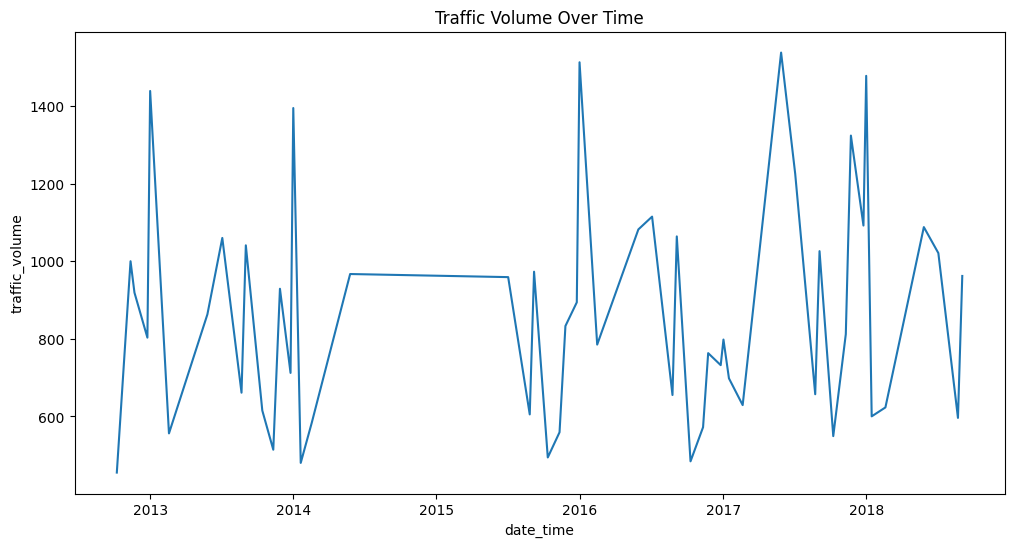

ValueError: could not convert string to float: 'Columbus Day'

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Load dataset
df = pd.read_csv("C:/Users/Deepak/OneDrive/Desktop/Fast Lane/Project-01/Metro_Interstate_Traffic_Volume.csv")

# Data Exploration
print(df.info())
print(df.describe())
print(df.head())

# Handling Missing Data
df.dropna(inplace=True)  # Remove rows with missing values

# Outlier Detection
# Identify and handle outliers based on specific features

# Categorical Variables
# Convert categorical variables to numerical formats
# Keep 'weather_main' and 'weather_description'
df = pd.get_dummies(df, columns=['weather_main', 'weather_description'], drop_first=False)

# Normalization/Scaling
# Use StandardScaler or MinMaxScaler to scale numerical features

# Feature Engineering
# Extract relevant time features
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

# Create lag features
df['lag_traffic_volume'] = df['traffic_volume'].shift(1)

# Exploratory Data Analysis (EDA)
# Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_time', y='traffic_volume', data=df)
plt.title('Traffic Volume Over Time')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Traffic Flow Analysis
# Explore traffic flow at different times and days

# Conclusion
# Summary of Findings and Recommendations

# Machine Learning Model (example using RandomForestRegressor)
# Assuming 'traffic_volume' is the target variable
X = df.drop(['traffic_volume', 'date_time'], axis=1)
y = df['traffic_volume']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and modeling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['uint8']).columns  # Updated to include the encoded categorical features

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE: {-cv_scores.mean()}')
